In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
X.shape

(300, 2)

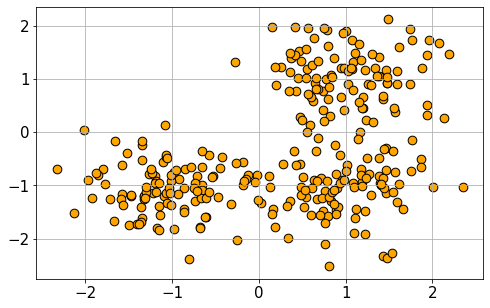

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c='orange',s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [5]:
# Compute Affinity Propagation
af_model = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af_model.cluster_centers_indices_
labels = af_model.labels_
n_clusters_ = len(cluster_centers_indices)

In [6]:
print("Number of clusters detected by the algorithm:", n_clusters_)

Number of clusters detected by the algorithm: 3


In [7]:
print("Cluster centers detected at:\n\n", X[cluster_centers_indices])

Cluster centers detected at:

 [[ 1.03325861  1.15123595]
 [ 0.93494652 -0.95302339]
 [-1.18459092 -1.11968959]]


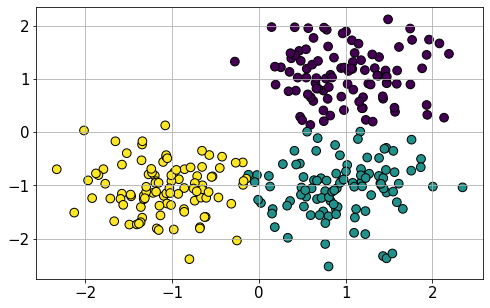

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c=af_model.labels_,s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
print ("Homogeneity score:", metrics.homogeneity_score(labels_true,labels))

Homogeneity score: 0.8715595298385134


In [10]:
print("Completeness score:",metrics.completeness_score(labels_true,labels))

Completeness score: 0.8715859753374195


In [11]:
x_new = [0.5,0.4]
x_pred = af_model.predict([x_new])[0]

In [12]:
print("New point ({},{}) will belong to cluster {}".format(x_new[0],x_new[1],x_pred))

New point (0.5,0.4) will belong to cluster 0


In [13]:
x_new = [-0.5,0.4]
x_pred = af_model.predict([x_new])[0]

In [14]:
print("New point ({},{}) will belong to cluster {}".format(x_new[0],x_new[1],x_pred))

New point (-0.5,0.4) will belong to cluster 2


In [16]:
import time
from tqdm import tqdm

In [17]:
n_samples = [10,20,50,100,200,500,1000,2000,3000,5000,7500,10000]
centers = [[1, 1], [-1, -1], [1, -1]]
t_aff = []
homo_aff=[]
complete_aff=[]

for i in tqdm(n_samples):
    X,labels_true = make_blobs(n_samples=i, centers=centers, cluster_std=0.5,random_state=0)
    t1 = time.time()
    af_model = AffinityPropagation(preference=-50,max_iter=50).fit(X)
    t2=time.time()
    t_aff.append(t2-t1)
    homo_aff.append(metrics.homogeneity_score(labels_true,af_model.labels_))
    complete_aff.append(metrics.completeness_score(labels_true,af_model.labels_))

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
 42%|████▏     | 5/12 [00:00<00:00, 38.70it/s]/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not ha

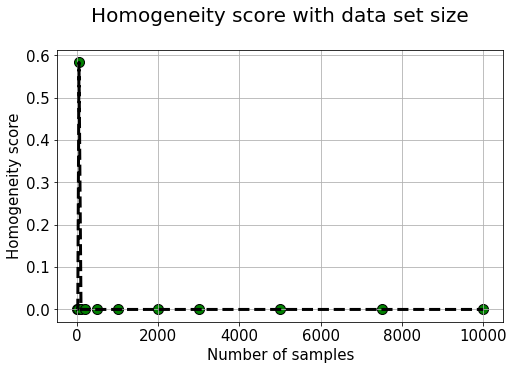

In [18]:
plt.figure(figsize=(8,5))
plt.title("Homogeneity score with data set size\n",fontsize=20)
plt.scatter(n_samples,homo_aff,edgecolors='k',c='green',s=100)
plt.plot(n_samples,homo_aff,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Homogeneity score",fontsize=15)
plt.show()

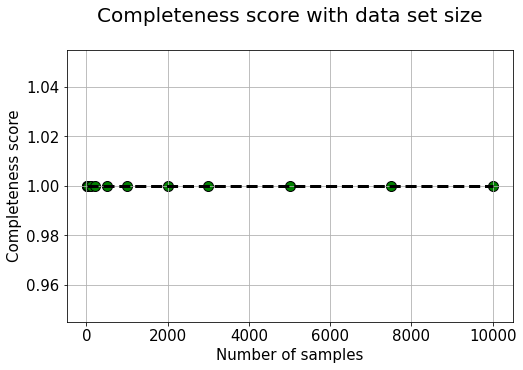

In [19]:
plt.figure(figsize=(8,5))
plt.title("Completeness score with data set size\n",fontsize=20)
plt.scatter(n_samples,complete_aff,edgecolors='k',c='green',s=100)
plt.plot(n_samples,complete_aff,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Completeness score",fontsize=15)
plt.show()

In [20]:
noise = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.25,1.5,1.75,2.0]
n_clusters = []
for i in noise:
    centers = [[1, 1], [-1, -1], [1, -1]]
    X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=i,random_state=101)
    af_model=AffinityPropagation(preference=-50,max_iter=500,convergence_iter=15,damping=0.5).fit(X)
    n_clusters.append(len(af_model.cluster_centers_indices_))

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


Detected number of clusters: [0, 0, 0, 0, 0, 3, 3, 3, 4, 4, 5, 6, 6, 7, 9, 9]


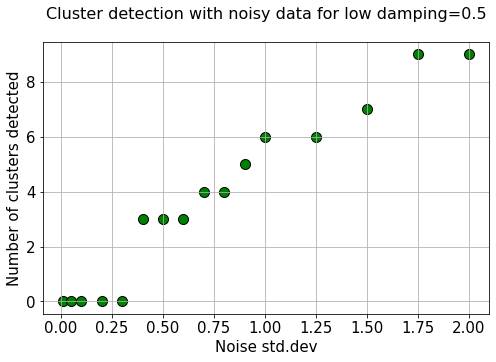

In [21]:
print("Detected number of clusters:",n_clusters)
plt.figure(figsize=(8,5))
plt.title("Cluster detection with noisy data for low damping=0.5\n",fontsize=16)
plt.scatter(noise,n_clusters,edgecolors='k',c='green',s=100)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Noise std.dev",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of clusters detected",fontsize=15)
plt.show()

In [22]:
noise = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.25,1.5,1.75,2.0]
n_clusters = []
for i in noise:
    centers = [[1, 1], [-1, -1], [1, -1]]
    X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=i,random_state=101)
    af_model=AffinityPropagation(preference=-50,max_iter=500,convergence_iter=15,damping=0.9).fit(X)
    n_clusters.append(len(af_model.cluster_centers_indices_))

Detected number of clusters: [3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 6, 6, 7]


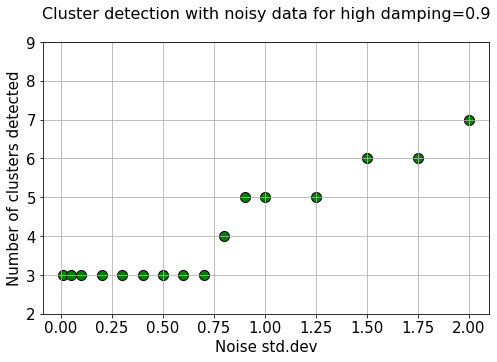

In [23]:
print("Detected number of clusters:",n_clusters)
plt.figure(figsize=(8,5))
plt.title("Cluster detection with noisy data for high damping=0.9\n",fontsize=16)
plt.scatter(noise,n_clusters,edgecolors='k',c='green',s=100)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Noise std.dev",fontsize=15)
plt.yticks([i for i in range(2,10)],fontsize=15)
plt.ylabel("Number of clusters detected",fontsize=15)
plt.show()